In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('./datasets/SMSSpamCollection', sep='\t', header=None)
df.columns = ['target', 'text']

In [3]:
print(df)

     target                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham               Will ü b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
df['target'] = df['target'].apply(lambda x: 1 if x == 'spam' else 0)

In [5]:
df.target.value_counts(normalize=True)

target
0    0.865937
1    0.134063
Name: proportion, dtype: float64

#### Treinar modelo

In [6]:
X = df['text']
y= df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
X_train_indices = X_train.index
X_test_indices = X_test.index

X_train_text = df['text'].iloc[X_train_indices]
X_test_text = df['text'].iloc[X_test_indices]

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

In [8]:
model = RandomForestClassifier()

model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [9]:
y_pred = model.predict(X_test_tfidf)

In [10]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
accuracy = accuracy_score(y_test, y_pred) # accuracy VP (Verdadeiro positivo) + VN (Verdadeiro Negativo) / VP + VN + FP (Falso positivo) + FN (Falso negativo)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.9798994974874372
Precision:  1.0
Recall:  0.8494623655913979


In [12]:
y_proba = model.predict_proba(X_test_tfidf)

In [13]:
y_proba

array([[0.99, 0.01],
       [0.93, 0.07],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.97, 0.03]])

In [14]:
y_proba_1 = y_proba[:,1]

In [15]:
y_proba_1

array([0.01, 0.07, 0.  , ..., 0.  , 0.01, 0.03])

In [16]:
df_count = y_test.count() + y_train.count()

array([[<Axes: title={'center': '0'}>]], dtype=object)

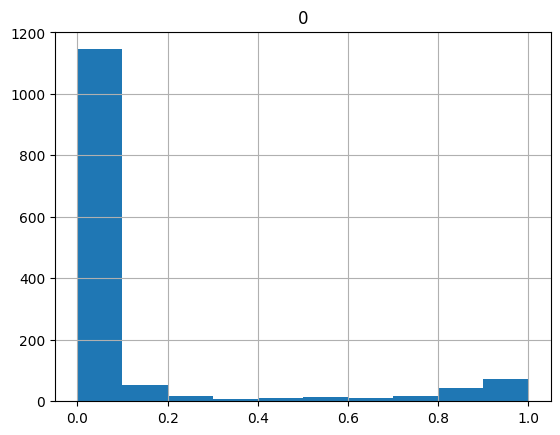

In [17]:
pd.DataFrame(y_proba_1).hist(bins = 10)

In [18]:
y_proba_count, bin_edges = np.histogram(y_proba_1, bins=10)

In [19]:
y_proba_count

array([1145,   54,   18,    8,   10,   13,   11,   17,   44,   73])

In [20]:
y_proba_percentage = (y_proba_count / (y_proba_count.sum())) * 100

In [21]:
y_proba_percentage

array([82.19669777,  3.87652548,  1.29217516,  0.57430007,  0.71787509,
        0.93323762,  0.7896626 ,  1.22038765,  3.15865039,  5.24048816])

In [22]:
df_results = pd.DataFrame({
  'y_proba_1': y_proba_1,
  'y_test': y_test
})

In [23]:
df_results_filtered = df_results[df_results['y_test'] == 1]

<Axes: >

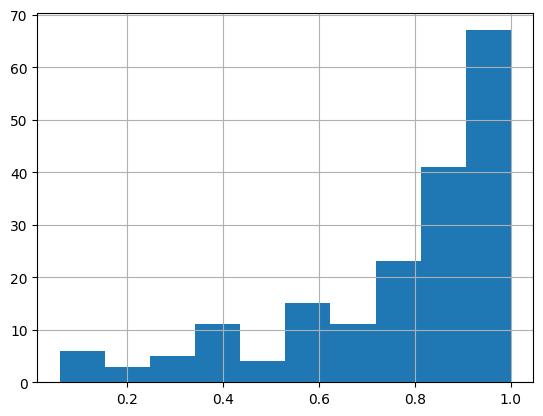

In [24]:
df_results_filtered['y_proba_1'].hist(bins=10)

In [25]:
y_proba_1_filtered = df_results_filtered['y_proba_1']

y_proba_1_filtered_count, bin_edges = np.histogram(y_proba_1_filtered, bins=10)

In [26]:
y_proba_1_filtered_count

array([ 6,  3,  5, 11,  4, 15, 11, 23, 41, 67])

In [27]:
y_proba_filtered_percentage = (y_proba_1_filtered_count / (y_proba_1_filtered_count.sum())) * 100

In [28]:
y_proba_filtered_percentage

array([ 3.22580645,  1.61290323,  2.68817204,  5.91397849,  2.15053763,
        8.06451613,  5.91397849, 12.3655914 , 22.04301075, 36.02150538])

In [29]:
df_melt = pd.DataFrame({
  'filtered_proba': y_proba_filtered_percentage,
  'proba': y_proba_percentage
})

In [30]:
df_melt

,filtered_proba,proba
0,3.225806,82.196698
1,1.612903,3.876525
2,2.688172,1.292175
3,5.913978,0.574300
4,2.150538,0.717875
5,8.064516,0.933238
6,5.913978,0.789663
7,12.365591,1.220388
8,22.043011,3.158650
9,36.021505,5.240488


/tmp/ipykernel_43849/3427427493.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(percentages)


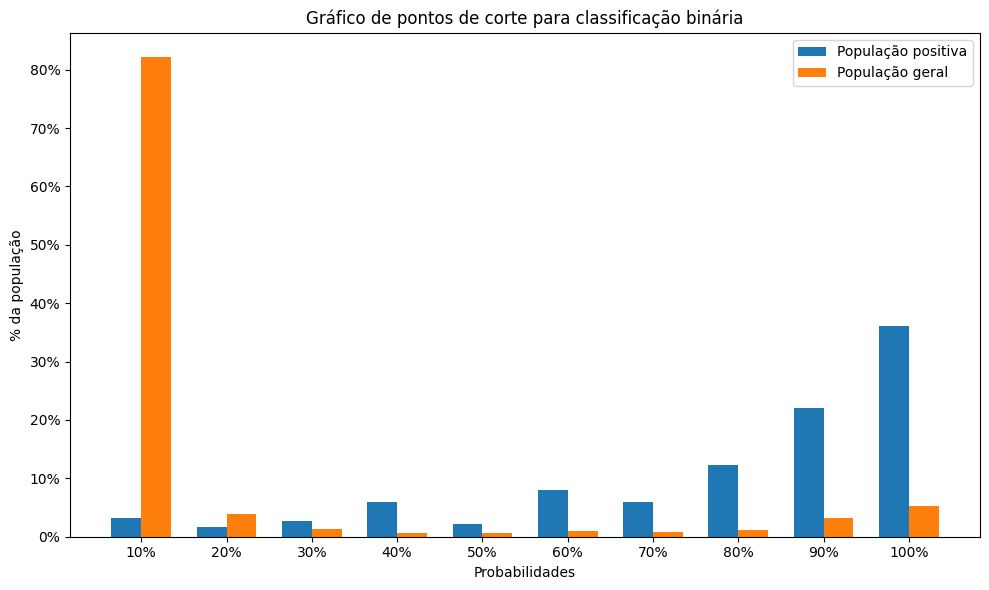

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(df_melt))

# Plotando as barras lado a lado
ax.bar(index, df_melt['filtered_proba'], bar_width, label='População positiva')
ax.bar([i + bar_width for i in index], df_melt['proba'], bar_width, label='População geral')

ax.set_xlabel('Probabilidades')
ax.set_ylabel('% da população')
ax.set_title('Gráfico de pontos de corte para classificação binária')

percentages = ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
ax.set_yticklabels(percentages)

percentages = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(percentages)

ax.legend()
plt.tight_layout()
plt.show()